This is a base jupyter notebook for other solutions. It loads the dataset, splits it to the training part (90%) and testing part (10%). It does not learn anything, it just randomly guesses the score for each student in testing part. It generates the solution with random floats inbetween 0 and 10.

In [1]:
%load_ext autoreload

Load libraries

In [2]:
%autoreload

# load libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [3]:
# read the dataset
dataset = pd.read_csv('../dataset/dataset.csv')


# Define the features and the target variable
target_variable = 'score'
X = dataset.drop(columns=[target_variable])
y = dataset[target_variable]

# Split the dataset into training and testing part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [4]:
print(dataset.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(192, 90)
(172, 89)
(172,)
(20, 89)
(20,)


In [5]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,AU26_r,AU45_r,bvpMean,bvpSD,edaMean,edaSD,hrMean,hrSD,tempMean,tempSD
42,2.943810e+07,1.998644e+07,1.437134e+08,4.833686e+08,2.306787e+08,3.025763e+09,2.514082e+08,6.328459e+07,1.302369e+09,2.655631e+07,...,0.837630,0.309486,0.193713,0.077658,0.006871,42.349295,66.387594,2.435843,36.394508,0.696228
104,4.060854e+08,2.845759e+08,1.885846e+09,5.003709e+08,1.178089e+08,5.578342e+09,6.647294e+07,5.561674e+07,1.546593e+08,4.464849e+08,...,0.184976,0.832731,1.303701,0.882440,-0.001239,52.995633,84.126481,3.631816,30.877747,0.258322
76,1.556490e+07,1.288987e+07,1.032507e+08,1.704621e+07,1.079477e+07,1.974401e+08,1.174413e+08,5.157638e+07,8.601966e+08,1.569393e+09,...,0.162555,0.948597,6.178320,0.874413,0.060220,51.786246,88.912019,5.171614,31.427262,0.319509
65,1.573082e+08,1.017205e+08,1.107742e+09,8.095620e+06,7.110808e+06,3.808411e+07,1.334271e+07,1.083087e+07,1.671368e+08,3.324417e+07,...,0.307263,0.127384,8.422057,2.751319,0.004349,41.532397,83.355363,6.213461,31.059597,0.694421
187,2.417054e+08,5.706243e+07,1.459052e+09,3.478477e+07,2.531873e+07,1.878347e+08,3.718951e+07,2.036266e+07,2.663333e+08,4.253611e+08,...,0.524999,0.539613,0.498900,0.440234,-0.011479,106.667491,90.930801,12.226984,32.185130,0.217717


In [6]:
# generate random predictions with the same length as y_test
random_predictions = np.random.uniform(low=0, high=10, size=len(y_test))

# calculate the mean absolute error
mae = mean_absolute_error(y_test, random_predictions)

print(f"mean absolute error of random predictions: {mae}")

mean absolute error of random predictions: 3.4420988947161164


R2 score: 0.6951498032964563
mean absolute error of regression tree: 0.5162536607129737


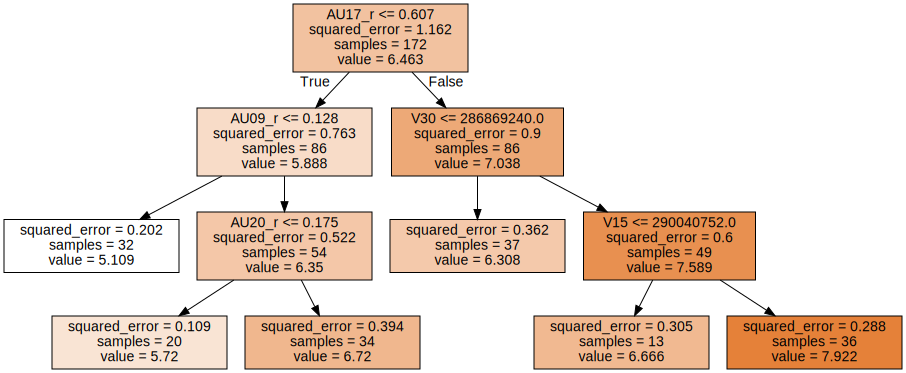

In [13]:
# Regression tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import graphviz

regt = DecisionTreeRegressor(random_state=42, min_impurity_decrease=0.05)
regt.fit(X_train, y_train)
regression_tree_predictions = regt.predict(X_test)

# calculate the mean absolute error
mae = mean_absolute_error(y_test, regression_tree_predictions)

print("R2 score: " + str(regt.score(X_test, y_test)))
print(f"mean absolute error of regression tree: {mae}")

dot_data = tree.export_graphviz(regt, out_file=None, feature_names=X.columns, filled=True)
graph = graphviz.Source(dot_data, format="png")
graph.render("regression_tree")
graph

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 90 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   V1           192 non-null    float64
 1   V2           192 non-null    float64
 2   V3           192 non-null    float64
 3   V4           192 non-null    float64
 4   V5           192 non-null    float64
 5   V6           192 non-null    float64
 6   V7           192 non-null    float64
 7   V8           192 non-null    float64
 8   V9           192 non-null    float64
 9   V10          192 non-null    float64
 10  V11          192 non-null    float64
 11  V12          192 non-null    float64
 12  V13          192 non-null    float64
 13  V14          192 non-null    float64
 14  V15          192 non-null    float64
 15  V16          192 non-null    float64
 16  V17          192 non-null    float64
 17  V18          192 non-null    float64
 18  V19          192 non-null    float64
 19  V20     

In [16]:
pd.options.display.float_format = '{:.2f}'.format
dataset.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,AU45_r,bvpMean,bvpSD,edaMean,edaSD,hrMean,hrSD,tempMean,tempSD,score
count,192.00,192.00,192.00,192.00,192.00,192.00,192.00,192.00,192.00,192.00,...,192.00,192.00,192.00,192.00,192.00,192.00,192.00,192.00,192.00,192.00
mean,963085495.65,404186282.89,14281831234.95,676749115.06,307173534.49,5397402502.57,489660485.58,232146143.92,5434247443.87,617327696.87,...,0.43,1.35,0.47,0.01,64.47,78.54,6.81,30.81,0.69,6.47
std,2948482281.88,1264067104.91,60286487388.68,2408741351.13,1241375993.18,16699194983.86,1967260090.75,998144140.04,23898766971.25,1945799698.15,...,0.27,1.94,0.57,0.02,28.15,9.04,3.74,2.27,0.99,1.08
min,6909398.10,7801725.53,17053318.81,7198605.41,6658573.09,38084108.21,9440603.60,7860253.93,26969051.89,15042253.01,...,0.04,0.02,0.01,-0.03,22.18,61.36,2.44,25.62,0.06,4.24
25%,24960880.19,15903469.59,177246323.44,68311967.75,40166405.43,229724783.22,26037071.14,20322591.64,139151077.69,33703467.66,...,0.18,0.22,0.08,-0.01,45.26,71.01,3.95,29.36,0.17,5.62
50%,157549997.27,87256796.29,1047476331.87,212100569.73,95290003.71,2409190448.89,59313736.45,37260601.67,289870030.95,163913830.02,...,0.39,0.51,0.21,0.00,54.02,78.84,5.27,30.81,0.26,6.38
75%,418391616.54,126474228.65,4450768301.43,454613287.60,113349046.68,4965059942.23,226884892.19,97736533.59,1484095788.20,456590000.00,...,0.63,1.60,0.84,0.03,76.96,84.84,8.72,32.24,0.81,7.34
max,16832447711.37,7015997774.15,367803183657.40,15329625537.00,7793305373.37,103100082425.75,12251162444.66,6217710362.78,143809376496.85,11930736292.27,...,1.02,10.07,2.75,0.07,137.22,101.14,17.98,36.39,4.96,8.98


In [17]:
display(dataset.corr())
with open('correlation.html', 'w') as f: # make it nicer
    print(dataset.corr().style.background_gradient()
.to_html(), file=f)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,AU45_r,bvpMean,bvpSD,edaMean,edaSD,hrMean,hrSD,tempMean,tempSD,score
V1,1.00,0.99,0.95,0.91,0.91,0.90,0.89,0.90,0.90,0.90,...,-0.08,-0.10,0.00,-0.09,0.22,-0.14,-0.03,-0.11,0.16,-0.17
V2,0.99,1.00,0.94,0.89,0.89,0.89,0.88,0.89,0.88,0.89,...,-0.09,-0.10,0.01,-0.09,0.24,-0.12,-0.02,-0.10,0.17,-0.18
V3,0.95,0.94,1.00,0.99,0.99,0.98,0.98,0.99,0.99,0.98,...,-0.10,-0.10,-0.08,-0.05,0.09,-0.25,-0.13,-0.08,0.16,-0.07
V4,0.91,0.89,0.99,1.00,1.00,0.99,0.99,0.99,1.00,0.98,...,-0.12,-0.12,-0.13,-0.04,0.03,-0.31,-0.17,-0.06,0.18,-0.04
V5,0.91,0.89,0.99,1.00,1.00,0.99,0.99,0.99,1.00,0.98,...,-0.12,-0.11,-0.12,-0.03,0.04,-0.29,-0.17,-0.06,0.17,-0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hrMean,-0.14,-0.12,-0.25,-0.31,-0.29,-0.32,-0.33,-0.30,-0.32,-0.28,...,0.07,0.26,0.37,-0.05,-0.01,1.00,0.32,0.09,-0.03,0.15
hrSD,-0.03,-0.02,-0.13,-0.17,-0.17,-0.16,-0.16,-0.16,-0.16,-0.17,...,-0.05,0.05,0.30,0.17,0.38,0.32,1.00,-0.11,0.53,0.06
tempMean,-0.11,-0.10,-0.08,-0.06,-0.06,-0.06,-0.06,-0.05,-0.06,-0.07,...,-0.06,0.29,0.20,0.04,-0.22,0.09,-0.11,1.00,-0.00,0.11
tempSD,0.16,0.17,0.16,0.18,0.17,0.20,0.17,0.17,0.17,0.14,...,-0.21,0.00,0.14,0.30,-0.09,-0.03,0.53,-0.00,1.00,0.00
